## Isolate hand from background
This is a test on one image of a hand gesture and the same ROI with just the background to try to isolate as best as possible the hand.  

Background could be very noisy so I'm hoping this will help the CNN to come up with a decision.

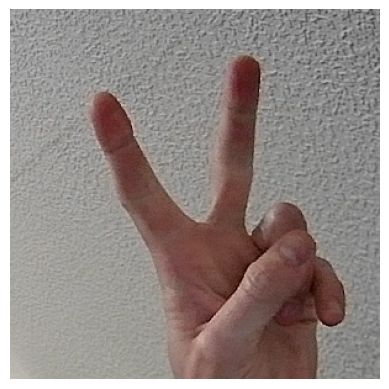

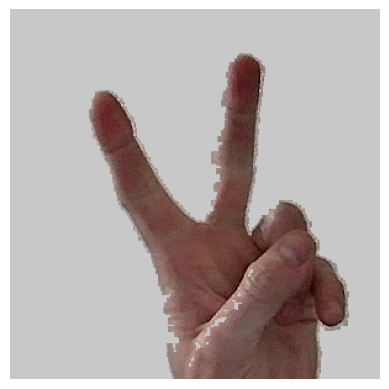

In [210]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(path: str) -> np.ndarray:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def display_image(image: np.ndarray) -> None:
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

roi = load_image('test/scissors.png')
roi_background = load_image('test/bkg.png')
threshold_amount = 15
display_image(roi)
# display_image(roi_background)

# Convert roi and background to grayscale
roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
bkg_gray = cv2.cvtColor(roi_background, cv2.COLOR_BGR2GRAY)
# Calculate absolute difference
diff = cv2.absdiff(roi_gray, bkg_gray)
# Apply adaptative thresholding
_, mask = cv2.threshold(diff, threshold_amount, 255, cv2.THRESH_BINARY)
# Apply Gaussian blur
mask = cv2.GaussianBlur(mask, (1, 1), 0)
# Perform erosion and dilatation to remove noise and fill holes in hand
kernel_size = 2
mask = cv2.erode(mask, np.ones((kernel_size, kernel_size), np.uint8), iterations=1)
kernel_size = 5
mask = cv2.dilate(mask, np.ones((kernel_size, kernel_size), np.uint8), iterations=1)
# Convert mask to 3 channels
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
# Create new background
new_bkg = np.ones_like(roi) * (200, 200, 200)
# Apply mask to copy of roi
new_roi = roi.copy()
new_roi[:, :] = np.where(mask > 10, roi, new_bkg)
# Display new roi
display_image(new_roi)